<a href="https://colab.research.google.com/github/DanielCavilla/Final-Project-of-the-AI-Programme/blob/main/Final_Project_of_the_Artificial_Intelligence_Programme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

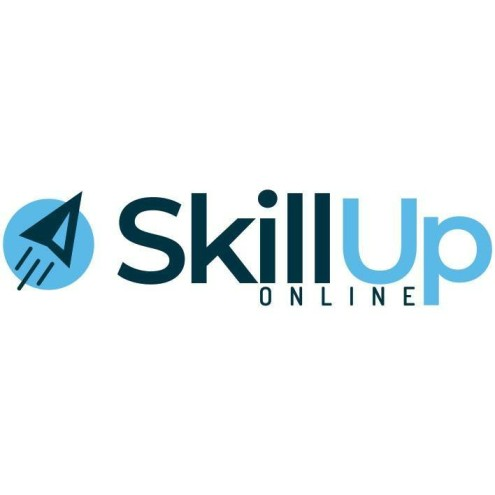

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importación de las bibliotecas necesarias

In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importación y organización del dataset

In [ ]:
# Importamos el DataFrame
dataframe= pd.read_csv('creditcard.csv')

# Visualizamos las cinco primeras filas del marco de datos
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Limpieza de los datos

a. Valores perdidos

In [ ]:
# Comprobamos si el DataFrame contiene valores nulos
dataframe.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

b. Datos duplicados

In [ ]:
# Identificamos la cantidad de datos duplicados en el dataframe
print(f'El número de datos duplicados es {dataframe.duplicated().sum()}')

El número de datos duplicados es 1081


In [ ]:
# Eliminamos los datos duplicados del DataFrame
dataframe = dataframe.drop_duplicates()

# Verificamos la eliminación de duplicados imprimiendo nuevamente el recuento de datos
print(f'El número de datos duplicados es {dataframe.duplicated().sum()}')

El número de datos duplicados es 0


### Análisis de los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [ ]:
# Calculamos y mostramos el porcentaje de transacciones fraudulentas
porcentaje_transacciones_fraudulentas= (len(dataframe[dataframe['Class']==1])/len(dataframe))*100
print(f'Un {porcentaje_transacciones_fraudulentas}% de las transacciones son fraudulentas')

Un 0.1667101358352777% de las transacciones son fraudulentas


Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [ ]:
# Calculamos y mostramos el importe medio de las transacciones fraudulentas
media_transacciones_fraudulentas= dataframe[dataframe['Class']==1]['Amount'].mean()
print(f'El importe medio de las transacciones fraudulentas es de {media_transacciones_fraudulentas}')

El importe medio de las transacciones fraudulentas es de 123.87186046511628


### Visualización de los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

El número de transacciones fraudulentas es 473
El número de transacciones no fraudulentas es 283253


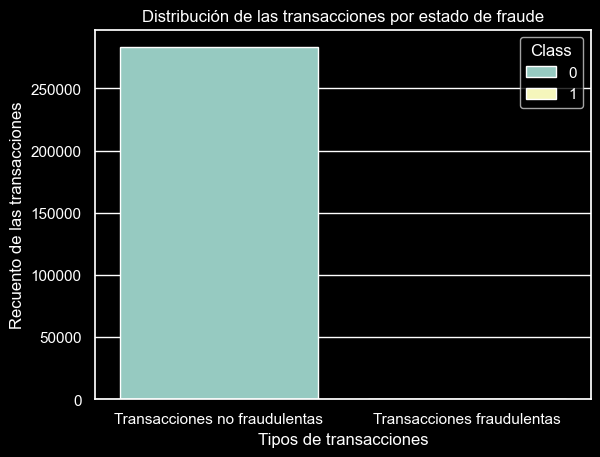

In [ ]:
# Contabilizamos y visualizamos el número de transacciones fraudulentas y no fraudulentas
print(f'El número de transacciones fraudulentas es {len(dataframe[dataframe['Class']==1])}')
print(f'El número de transacciones no fraudulentas es {len(dataframe[dataframe['Class']==0])}')

# Presentamos un gráfico de barras vertical que compara el total de transacciones fraudulentas frente a las no fraudulentas
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")
sns.countplot(x='Class', data=dataframe, hue='Class')
plt.xlabel('Tipos de transacciones')
plt.ylabel('Recuento de las transacciones')
plt.title('Distribución de las transacciones por estado de fraude')
plt.xticks([0, 1], ['Transacciones no fraudulentas', 'Transacciones fraudulentas'])
plt.show()

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


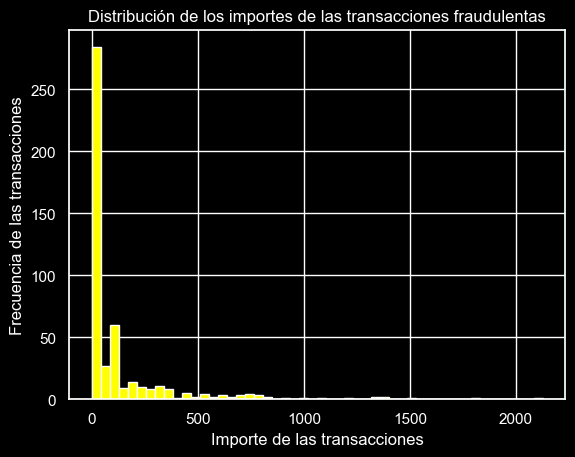

In [ ]:
# Filtramos el DataFrame para que contenga únicamente los datos de transacciones fraudulentas
transacciones_fraudulentas= dataframe[dataframe['Class']==1]

# Mostramos en un histograma la distribución de los importes de las transacciones fraudulentas
transacciones_fraudulentas['Amount'].hist(bins=50, color= 'yellow')
plt.title('Distribución de los importes de las transacciones fraudulentas')
plt.xlabel('Importe de las transacciones')
plt.ylabel('Frecuencia de las transacciones')
plt.show()

## Desarrollo y evaluación de modelos

### Separación del dataset

In [ ]:
# Eliminamos la columna 'Class' del DataFrame y la asignamos a 'X'
X = dataframe.drop('Class', axis=1)

# Asignamos la columna 'Class' a 'y'
y = dataframe['Class']

# Importamos la función 'train_test_split' para separar los datos
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Creación y evaluación de los modelos

In [ ]:
# Importamos la función del algoritmo RandomForestClassifier y las funciones de evaluación del rendimiento
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Creamos una instancia del modelo
randomforest = RandomForestClassifier(max_depth=150, random_state=42)

# Entrenamos el modelo
randomforest.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = randomforest.predict(X_test)

# Evaluamos el modelo
print(f"La exactitud del modelo es de un {accuracy_score(y_test, y_pred) * 100}%")

La exactitud del modelo es de un 99.966517463786%
